In [31]:
import pandas as pd
import numpy as np
import nirsimple as ns

In [32]:
f = open("D:\FYP\Our Data\Poojani\\2 - back task-poojani-LED switching time 2000ms.txt",'rt')

In [33]:
data=f.readlines()

In [34]:
oxy_data=[]
deoxy_data=[]

In [35]:
for line in data:
    #print(line)
    if line[0]=='O':
        oxy=True
    elif line[0]=='D':
        oxy=False
    else:
        l=line[:-9].split()
        values=[]
        for i in l:
            values.append(int(i[4:]))
        if oxy:
            oxy_data.append(values)
        else:
            deoxy_data.append(values)
print(deoxy_data)
oxy_np=np.array(oxy_data)
deoxy_np=np.array(deoxy_data)
    

[[64, 200, 181, 128, 82], [67, 206, 183, 134, 80], [67, 208, 185, 134, 81], [66, 202, 186, 130, 78], [65, 205, 189, 131, 78], [65, 197, 177, 126, 77], [65, 206, 177, 128, 80], [64, 201, 175, 126, 81], [68, 201, 174, 128, 79], [66, 196, 172, 126, 79], [66, 206, 197, 135, 77], [64, 209, 193, 133, 83], [65, 208, 192, 131, 82], [67, 207, 192, 132, 81], [68, 210, 194, 134, 81], [68, 206, 190, 132, 80], [66, 202, 195, 133, 77], [64, 206, 192, 132, 81], [64, 211, 190, 132, 81], [67, 204, 195, 131, 82], [67, 206, 194, 136, 81], [67, 208, 196, 136, 81], [65, 204, 202, 133, 76], [65, 204, 201, 134, 77], [64, 204, 196, 132, 78], [64, 207, 200, 134, 82], [65, 208, 200, 133, 81], [67, 206, 196, 134, 81], [68, 205, 196, 136, 81], [65, 205, 200, 133, 79], [65, 206, 198, 135, 79], [64, 208, 200, 132, 82], [64, 204, 197, 135, 81], [68, 204, 199, 133, 82], [67, 205, 199, 139, 82], [67, 208, 201, 135, 81], [66, 205, 201, 136, 78], [66, 206, 200, 137, 78], [64, 211, 197, 135, 80], [65, 206, 198, 132, 82],

In [36]:
print(oxy_np)

[[ 66 180 250 296 236]
 [ 67 185 252 294 237]
 [ 65 182 253 290 238]
 [ 64 182 254 291 237]
 [ 66 182 253 293 233]
 [ 67 183 254 292 237]
 [ 65 180 256 293 239]
 [ 66 173 254 292 231]
 [ 66 176 256 297 233]
 [ 67 173 251 293 235]
 [ 64 180 254 291 235]
 [ 66 171 252 290 227]
 [ 65 175 253 290 229]
 [ 66 180 253 294 233]
 [ 67 178 256 292 230]
 [ 66 179 261 295 230]
 [ 66 175 261 292 230]
 [ 66 178 262 294 231]
 [ 68 177 260 294 232]
 [ 65 183 260 292 232]
 [ 66 180 267 296 227]
 [ 66 180 268 300 232]
 [ 68 179 266 298 229]
 [ 65 179 265 296 231]
 [ 66 176 267 296 230]
 [ 68 186 266 302 234]
 [ 67 182 266 299 233]
 [ 65 185 265 296 235]
 [ 66 179 269 297 230]
 [ 66 173 266 295 229]
 [ 64 181 264 289 234]
 [ 64 178 262 295 232]
 [ 67 179 266 296 230]
 [ 67 177 265 298 232]
 [ 67 175 263 298 232]
 [ 65 176 266 297 232]
 [ 66 180 266 299 229]
 [ 67 177 266 299 232]
 [ 68 176 264 297 232]
 [ 64 180 266 296 234]
 [ 66 175 264 297 231]
 [ 68 185 265 301 232]
 [ 65 180 264 296 232]
 [ 65 183 2

In [37]:
print(oxy_np.shape)
print(deoxy_np.shape)

(145, 5)
(140, 5)


In [62]:
arr_len=min(len(oxy_np),len(deoxy_np))
oxy_np=oxy_np[:arr_len]
deoxy_np=deoxy_np[:arr_len]
print(deoxy_np.shape)

(140, 5)


In [39]:
oxy_adc_df=pd.DataFrame(oxy_np,columns=['channel1_o','channel2_o','channel3_o','channel4_o','channel5_o'])
deoxy_adc_df=pd.DataFrame(deoxy_np,columns=['channel1_d','channel2_d','channel3_d','channel4_d','channel5_d'])

In [40]:
print(oxy_adc_df)
print(deoxy_adc_df)

     channel1_o  channel2_o  channel3_o  channel4_o  channel5_o
0            66         180         250         296         236
1            67         185         252         294         237
2            65         182         253         290         238
3            64         182         254         291         237
4            66         182         253         293         233
..          ...         ...         ...         ...         ...
135          64         183         261         291         233
136          64         184         260         292         235
137          66         183         262         295         235
138          67         183         258         294         232
139          68         180         257         293         230

[140 rows x 5 columns]
     channel1_d  channel2_d  channel3_d  channel4_d  channel5_d
0            64         200         181         128          82
1            67         206         183         134          80
2            67 

In [41]:


def simple_baseline_correction(data, baseline_start, baseline_end):
  
  baseline_window = data[baseline_start:baseline_end, :]  # Extract baseline data
  baseline_average = np.mean(baseline_window, axis=0)  # Average baseline for each channel
  baseline_corrected_data = data - baseline_average[np.newaxis, :]  # Subtract baseline from all data
  return baseline_corrected_data


In [42]:

baseline_corrected_data=simple_baseline_correction(oxy_np,0,10)
baseline_window = oxy_np[0:10, :]  # Extract baseline data
baseline_average = np.mean(baseline_window, axis=0) 
oxy_od_np = -np.log10(baseline_corrected_data/baseline_average)
oxy_od_df=pd.DataFrame(oxy_od_np)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17684\3579734580.py:4: RuntimeWarning: invalid value encountered in log10
  oxy_od_np = -np.log10(baseline_corrected_data/baseline_average)


In [43]:

baseline_corrected_data=simple_baseline_correction(deoxy_np,0,10)
baseline_window = deoxy_np[0:10, :]  # Extract baseline data
baseline_average = np.mean(baseline_window, axis=0) 
deoxy_od_np = -np.log10(baseline_corrected_data/baseline_average)
deoxy_od_df=pd.DataFrame(deoxy_od_np)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17684\4177391290.py:4: RuntimeWarning: invalid value encountered in log10
  deoxy_od_np = -np.log10(baseline_corrected_data/baseline_average)


In [44]:
import matplotlib.pyplot as plt

ADC Values

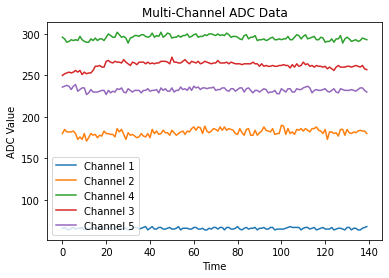

In [45]:

plt.plot(oxy_adc_df['channel1_o'], label='Channel 1')  # Add label for channel1
plt.plot(oxy_adc_df['channel2_o'],label='Channel 2')  # Uncomment if you want to include channel2
plt.plot(oxy_adc_df['channel4_o'], label='Channel 4')
plt.plot(oxy_adc_df['channel3_o'], label='Channel 3')
plt.plot(oxy_adc_df['channel5_o'], label='Channel 5')

plt.legend()

# Other customizations (optional)
plt.xlabel('Time')
plt.ylabel('ADC Value')
plt.title('Multi-Channel ADC Data')
#plt.grid(True)  # Add grid lines for better readability

plt.show()


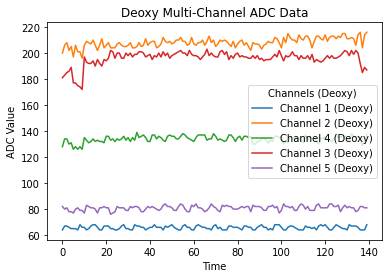

In [46]:

plt.plot(deoxy_adc_df['channel1_d'], label='Channel 1 (Deoxy)')  # Add label with clarification
plt.plot(deoxy_adc_df['channel2_d'], label='Channel 2 (Deoxy)')
plt.plot(deoxy_adc_df['channel4_d'], label='Channel 4 (Deoxy)')
plt.plot(deoxy_adc_df['channel3_d'], label='Channel 3 (Deoxy)')
plt.plot(deoxy_adc_df['channel5_d'], label='Channel 5 (Deoxy)')

# Add the legend with title
plt.legend(title='Channels (Deoxy)')

# Other customizations (optional)
plt.xlabel('Time')
plt.ylabel('ADC Value')
plt.title('Deoxy Multi-Channel ADC Data')
#plt.grid(True)  # Add grid lines for better readability

plt.show()


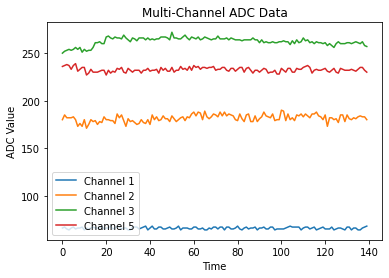

In [47]:

plt.plot(oxy_adc_df['channel1_o'], label='Channel 1')  # Add label for channel1
plt.plot(oxy_adc_df['channel2_o'],label='Channel 2')  # Uncomment if you want to include channel2
#plt.plot(oxy_adc_df['channel4_o'], label='Channel 4')
plt.plot(oxy_adc_df['channel3_o'], label='Channel 3')
plt.plot(oxy_adc_df['channel5_o'], label='Channel 5')

plt.legend()

# Other customizations (optional)
plt.xlabel('Time')
plt.ylabel('ADC Value')
plt.title('Multi-Channel ADC Data')
#plt.grid(True)  # Add grid lines for better readability

plt.show()


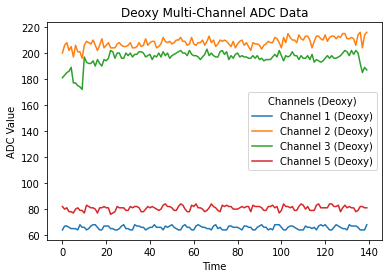

In [48]:

plt.plot(deoxy_adc_df['channel1_d'], label='Channel 1 (Deoxy)')  # Add label with clarification
plt.plot(deoxy_adc_df['channel2_d'], label='Channel 2 (Deoxy)')
#plt.plot(deoxy_adc_df['channel4_d'], label='Channel 4 (Deoxy)')
plt.plot(deoxy_adc_df['channel3_d'], label='Channel 3 (Deoxy)')
plt.plot(deoxy_adc_df['channel5_d'], label='Channel 5 (Deoxy)')

# Add the legend with title
plt.legend(title='Channels (Deoxy)')

# Other customizations (optional)
plt.xlabel('Time')
plt.ylabel('ADC Value')
plt.title('Deoxy Multi-Channel ADC Data')
#plt.grid(True)  # Add grid lines for better readability

plt.show()


Optical Density

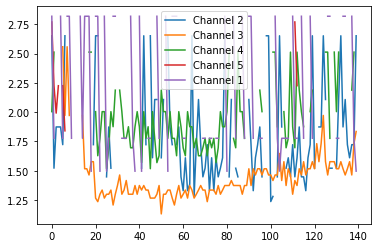

In [49]:
plt.plot(oxy_od_df[1],label='Channel 2')
plt.plot(oxy_od_df[2],label='Channel 3')
plt.plot(oxy_od_df[3],label='Channel 4')
plt.plot(oxy_od_df[4],label='Channel 5')
plt.plot(oxy_od_df[0],label='Channel 1')
plt.legend()

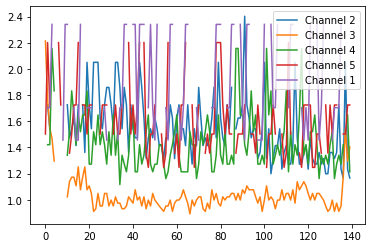

In [50]:
plt.plot(deoxy_od_df[1],label='Channel 2')
plt.plot(deoxy_od_df[2],label='Channel 3')
plt.plot(deoxy_od_df[3],label='Channel 4')
plt.plot(deoxy_od_df[4],label='Channel 5')
plt.plot(deoxy_od_df[0],label='Channel 1')
plt.legend()

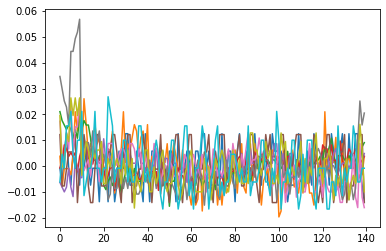

In [87]:
combined_ADC=np.concatenate((oxy_np,deoxy_np,),axis=1)
dod = ns.intensities_to_od_changes(combined_ADC.T)
plt.plot(dod.T)


(10, 140)


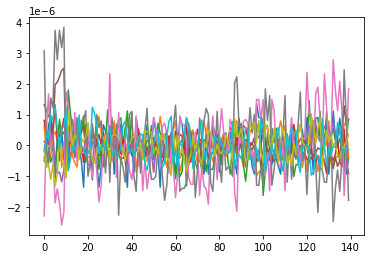

In [89]:
combined=np.concatenate((oxy_od_np,deoxy_od_np,),axis=1)
raw_ch_names=['1-1', '1-2', '1-3', '1-4','1-5','1-1', '1-2', '1-3', '1-4','1-5']
ch_wl=[850, 850, 850, 850, 850, 720, 720, 720, 720,720]
unique_dpf = 6
ch_dpf = [unique_dpf for _ in enumerate(raw_ch_names)]
unique_distance = 3  # cm
#ch_distances = [unique_distance for _ in enumerate(raw_ch_names)]
ch_distances=[3,3,3,1,3,3,3,3,1,3]
data = ns.mbll(dod, raw_ch_names, ch_wl, ch_dpf, ch_distances,
               unit='cm', table='wray')
dc, ch_names, ch_types = data
print(dc.shape)
plt.plot(dc.T)